# Part 2
## 1. Knn Classifier

Imports

In [34]:
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

Important functions

In [35]:
"""
    Calculates the eyclidean distance between to vectors
"""
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

"""
    Implements the knn algorithm
"""
def knn(data, query, k): 
    neighbor_distances = []
    for index, row in enumerate(data):
        distance = euclidean_distance(row, query)
        neighbor_distances.append((distance, index))
    
    sorted_neighbor_distances = sorted(neighbor_distances)
    k_nearest_distances_and_indices = sorted_neighbor_distances[:k]

    #return only the indeces
    return [i[1] for i in k_nearest_distances_and_indices] 

"""
    Takes a list with objects and returns the one that appears
    the most inside the list.
"""
def most_frequent(label_list): 
    counter = 0
    most_common = label_list[0] 
    for label in label_list: 
        curr_frequency = label_list.count(label) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            most_common = label 
    return most_common 

"""
    Splits tha given dataset to test and train according to the index. That is 
    to implement the 10-Fold cross validation
"""
def split_test_train(df, index):
    test = df[int(index*len(df)*0.1):int(index*len(df)*0.1)+int(len(df)*0.1)]
    train = df[0:int(index*len(df)*0.1)]
    train = train.append(df[int(index*len(df)*0.1)+int(len(df)*0.1):])
    return train, test

"""
    Draws a scatter with the means in the y axe and Ks in the x.
"""
def draw_scatter(ks, means):
    plt.scatter(ks, means)
    plt.ylabel('Mean')
    plt.xlabel('K')

Runs the **KNN classifier** for **40 ks** on the given dataset using **10-fold _cross valistation_**

In [48]:
def Knn_classifier(df):
    ks = []
    means = []
    for k in range(1,40):

        sum = 0
        for index in range(10):
            # Make the train/test set
            train, test = split_test_train(df, index)


            train_x = train.iloc[:,:-1].values
            train_y = train.iloc[:,-1].values

            test_x = test.iloc[:,:-1].values
            test_y = test.iloc[:,-1].values


            ## ------ KNN ------ ## 
            total_correct = 0
            t_y = list(train_y)
            for i in range(len(test_x)):
                results=knn(train_x, test_x[i], k)
                label_results = []
                for j in sorted(results):
                    label_results.append(t_y[j])
                final_label = most_frequent(list(label_results))

                if(final_label == test_y[i]):
                    total_correct +=1

            accuracy = total_correct/len(test_x)
            sum += accuracy

        means.append(sum/10)
        ks.append(k)
        print("K:", k, "Percentage of Mean of Accuracy : ", round(sum/10, 4)*100, "%")
    return ks, means

---

# Experiments.

## 1. Iris Dataset

In [49]:
file_path = "../UCIdata-exercise1/iris.data"

df = pd.read_csv(file_path, header=None).sample(frac=1)
ks, means = Knn_classifier(df)

K: 1 Percentage of Mean of Accuracy :  96.0 %
K: 2 Percentage of Mean of Accuracy :  95.33 %
K: 3 Percentage of Mean of Accuracy :  96.67 %
K: 4 Percentage of Mean of Accuracy :  96.0 %
K: 5 Percentage of Mean of Accuracy :  96.67 %
K: 6 Percentage of Mean of Accuracy :  96.67 %
K: 7 Percentage of Mean of Accuracy :  96.0 %
K: 8 Percentage of Mean of Accuracy :  96.67 %
K: 9 Percentage of Mean of Accuracy :  96.0 %
K: 10 Percentage of Mean of Accuracy :  96.0 %
K: 11 Percentage of Mean of Accuracy :  96.67 %
K: 12 Percentage of Mean of Accuracy :  96.0 %
K: 13 Percentage of Mean of Accuracy :  96.67 %
K: 14 Percentage of Mean of Accuracy :  96.67 %
K: 15 Percentage of Mean of Accuracy :  96.67 %
K: 16 Percentage of Mean of Accuracy :  97.33000000000001 %
K: 17 Percentage of Mean of Accuracy :  96.67 %
K: 18 Percentage of Mean of Accuracy :  96.67 %
K: 19 Percentage of Mean of Accuracy :  96.67 %
K: 20 Percentage of Mean of Accuracy :  96.0 %
K: 21 Percentage of Mean of Accuracy :  96.0

Max mean of accuracy:  0.973333  for k: 16


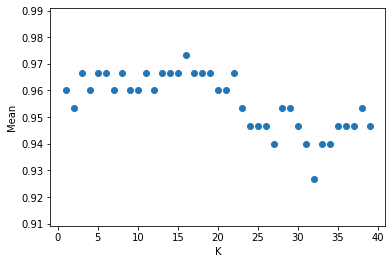

In [50]:
draw_scatter(ks, means)
print("Max mean of accuracy: ", round(max(means),6), " for k:", ks[means.index(max(means))])

---

## Pima Indians Diabetes Dataset

In [51]:
file_path = "../UCIdata-exercise1/pima-indians-diabetes.data"


df = pd.read_csv(file_path, header=None).sample(frac=1)
ks, means = Knn_classifier(df)

K: 1 Percentage of Mean of Accuracy :  68.28999999999999 %
K: 2 Percentage of Mean of Accuracy :  67.75999999999999 %
K: 3 Percentage of Mean of Accuracy :  69.61 %
K: 4 Percentage of Mean of Accuracy :  70.66 %
K: 5 Percentage of Mean of Accuracy :  71.58 %
K: 6 Percentage of Mean of Accuracy :  71.17999999999999 %
K: 7 Percentage of Mean of Accuracy :  73.42 %
K: 8 Percentage of Mean of Accuracy :  72.24000000000001 %
K: 9 Percentage of Mean of Accuracy :  74.08 %
K: 10 Percentage of Mean of Accuracy :  73.42 %
K: 11 Percentage of Mean of Accuracy :  73.16 %
K: 12 Percentage of Mean of Accuracy :  74.08 %
K: 13 Percentage of Mean of Accuracy :  74.33999999999999 %
K: 14 Percentage of Mean of Accuracy :  74.74 %
K: 15 Percentage of Mean of Accuracy :  75.13 %
K: 16 Percentage of Mean of Accuracy :  74.61 %
K: 17 Percentage of Mean of Accuracy :  75.39 %
K: 18 Percentage of Mean of Accuracy :  75.66000000000001 %
K: 19 Percentage of Mean of Accuracy :  75.66000000000001 %
K: 20 Percent

Max mean:  0.761842  for k: 22


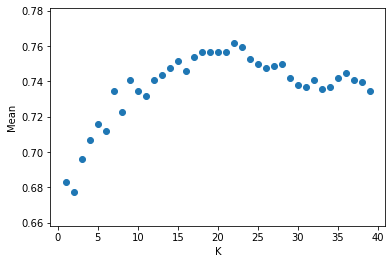

In [52]:
draw_scatter(ks, means)
print("Max mean: ", round(max(means),6), " for k:", ks[means.index(max(means))])

---

## Report

As we can see in KNN, in both of the tests, as we increased the value of K the accuracy of the classification increased. Then, it find a pick in which we get the best results, and then it started to fall. That happens because as the K gets bigger a lot more non reliable points are getting to our spying region and which they polute our classification